# Machine Learning

### Выбранный датасет: [HTRU2](https://archive.ics.uci.edu/ml/datasets/HTRU2). Он содержит данные о возможных пульсарах.

Пульсар - это редкий тип нейтронных звезд, радиоизлучение которых может быть зарегистрировано на Земле в виде переодических всплесков (импульсов).

Каждый пульсар обладает уникальным повторяющимся профилем (Integrated Profile), который создается его сигналом.

Тем не менее, на практике довольно сложно отличить сигнал истинного пульсара от радиочастотных помех (RFI) и шума.

Поэтому возникает задача маркировки кандидатов в пульсары для облегчения дальнейшего анализа.

Датасет предназначен для построения модели машинного обучения, которая по входным параметрам определит кандидата на пульсар для более глубокого изучения.

Датасет содержит **17 898** примеров:
* **16 259** ложных примеров - это радиочастотные помехи (RFI) и шум
* **1 639** реальных примеров - это излучения пульсаров

Информация об атрибутах:
* **Profile_mean** - cреднее значение интегрированного профиля
* **Profile_stdev** - стандартное отклонение интегрированного профиля
* **Profile_kurtosis** - коэффициент эксцесса (островершинности) интегрированного профиля
* **Profile_skewness** - коэффициент асимметрии интегрированного профиля
* **DM_mean** - cреднее значение DM-SNR кривой (Dispersion Measure of the Signal to Noise Ratio)
* **DM_stdev** - стандартное отклонение DM-SNR кривой
* **DM_kurtosis** - коэффициент эксцесса (островершинности) DM-SNR кривой
* **DM_skewness** - коэффициент асимметрии DM-SNR кривой
* **class** - класс объекта: излучение пульсара = 1, помехи и шум = 0

## Готовим данные

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import time                     # Замер времени работы
import graphviz                 # Графика
import warnings

%matplotlib inline
# Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
warnings.filterwarnings("ignore")

In [2]:
data_raw = pd.read_csv('../HTRU2/HTRU_2.csv', sep = ',', engine = 'python')

In [3]:
type(data_raw)

pandas.core.frame.DataFrame

In [4]:
data_raw

,Profile_mean,Profile_stdev,Profile_kurtosis,Profile_skewness,DM_mean,DM_stdev,DM_kurtosis,DM_skewness,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [5]:
print(data_raw)

       Profile_mean  Profile_stdev  Profile_kurtosis  Profile_skewness  \
0        140.562500      55.683782         -0.234571         -0.699648   
1        102.507812      58.882430          0.465318         -0.515088   
2        103.015625      39.341649          0.323328          1.051164   
3        136.750000      57.178449         -0.068415         -0.636238   
4         88.726562      40.672225          0.600866          1.123492   
...             ...            ...               ...               ...   
17893    136.429688      59.847421         -0.187846         -0.738123   
17894    122.554688      49.485605          0.127978          0.323061   
17895    119.335938      59.935939          0.159363         -0.743025   
17896    114.507812      53.902400          0.201161         -0.024789   
17897     57.062500      85.797340          1.406391          0.089520   

          DM_mean   DM_stdev  DM_kurtosis  DM_skewness  class  
0        3.199833  19.110426     7.975532    74

In [6]:
data_raw.head()

,Profile_mean,Profile_stdev,Profile_kurtosis,Profile_skewness,DM_mean,DM_stdev,DM_kurtosis,DM_skewness,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [7]:
data_raw.tail()

,Profile_mean,Profile_stdev,Profile_kurtosis,Profile_skewness,DM_mean,DM_stdev,DM_kurtosis,DM_skewness,class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [8]:
print(data_raw.shape)
print(data_raw.columns)

(17898, 9)
Index(['Profile_mean', 'Profile_stdev', 'Profile_kurtosis', 'Profile_skewness',
       'DM_mean', 'DM_stdev', 'DM_kurtosis', 'DM_skewness', 'class'],
      dtype='object')


In [9]:
data_raw.index

RangeIndex(start=0, stop=17898, step=1)

In [10]:
data_raw.at[4, 'DM_mean']

1.178929766

In [11]:
data_raw['DM_mean']

0          3.199833
1          1.677258
2          3.121237
3          3.642977
4          1.178930
            ...    
17893      1.296823
17894     16.409699
17895     21.430602
17896      1.946488
17897    188.306020
Name: DM_mean, Length: 17898, dtype: float64

In [12]:
data_raw['DM_mean'][2]

3.121237458

In [13]:
data_raw['DM_mean'].dtype.name

'float64'

In [14]:
type(data_raw['DM_mean'][2])

numpy.float64

In [15]:
type(data_raw['DM_mean'])

pandas.core.series.Series

In [16]:
data_raw[['DM_mean', 'DM_kurtosis']].head()

,DM_mean,DM_kurtosis
0,3.199833,7.975532
1,1.677258,10.576487
2,3.121237,7.735822
3,3.642977,6.896499
4,1.178930,14.269573


"Profile_mean","Profile_stdev","Profile_kurtosis","Profile_skewness","DM_mean","DM_stdev","DM_kurtosis","DM_skewness","class"

### Анализ выбросов
Проведем анализ выбросов посредством разделения значений признаков на квантили и сравнения полученных данных с минимальными и максимальными значениями.

In [17]:
q_data = data_raw.quantile([0.005, 0.1, 0.3, 0.5, 0.7, 0.9, 0.995])
pd.concat(objs = [data_raw.agg(['min']), q_data, data_raw.agg(['max'])], join = 'inner')

,Profile_mean,Profile_stdev,Profile_kurtosis,Profile_skewness,DM_mean,DM_stdev,DM_kurtosis,DM_skewness,class
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.0
0.005,13.573398,28.968244,-0.737330,-1.022526,0.500811,8.765984,-1.177272,-1.860524,0.0
0.1,82.958594,37.408646,-0.133219,-0.428868,1.306605,12.131926,1.979330,2.839540,0.0
0.3,104.415625,43.497919,0.066962,-0.117424,2.081940,15.104007,6.502731,45.700499,0.0
0.5,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.0
0.7,124.546875,50.142118,0.410066,0.706525,4.382107,25.084360,10.143426,124.596210,0.0
0.9,137.236719,54.412099,0.891816,2.765966,30.573495,59.080452,13.466038,220.351313,0.0
0.995,161.477031,67.535708,6.184090,41.361095,173.156212,95.405519,23.681145,629.834054,1.0
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.0


Видим, что выбросы есть, так как для каждого столбца присутствуют значения, существенно выходящие за пределы диапазона остальных 99% значений этого признака.
Исключим строки с такими значениями.

In [18]:
rows_to_drop = data_raw[
    (data_raw['Profile_mean'] < data_raw['Profile_mean'].quantile(0.005)) | (data_raw['Profile_mean'] > data_raw['Profile_mean'].quantile(0.995)) |
    (data_raw['Profile_stdev'] < data_raw['Profile_stdev'].quantile(0.005)) | (data_raw['Profile_stdev'] > data_raw['Profile_stdev'].quantile(0.995)) |
    (data_raw['Profile_kurtosis'] < data_raw['Profile_kurtosis'].quantile(0.005)) | (data_raw['Profile_kurtosis'] > data_raw['Profile_kurtosis'].quantile(0.995)) |
    (data_raw['Profile_skewness'] < data_raw['Profile_skewness'].quantile(0.005)) | (data_raw['Profile_skewness'] > data_raw['Profile_skewness'].quantile(0.995)) |
    (data_raw['DM_mean'] < data_raw['DM_mean'].quantile(0.005)) | (data_raw['DM_mean'] > data_raw['DM_mean'].quantile(0.995)) |
    (data_raw['DM_stdev'] < data_raw['DM_stdev'].quantile(0.005)) | (data_raw['DM_stdev'] > data_raw['DM_stdev'].quantile(0.995)) |
    (data_raw['DM_kurtosis'] < data_raw['DM_kurtosis'].quantile(0.005)) | (data_raw['DM_kurtosis'] > data_raw['DM_kurtosis'].quantile(0.995)) |
    (data_raw['DM_skewness']  < data_raw['DM_skewness'].quantile(0.005)) | (data_raw['DM_skewness']  > data_raw['DM_skewness'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(17126, 9)

In [19]:
data.agg(['min', 'max'])

,Profile_mean,Profile_stdev,Profile_kurtosis,Profile_skewness,DM_mean,DM_stdev,DM_kurtosis,DM_skewness,class
min,13.601562,28.968396,-0.729545,-1.020067,0.509197,8.773553,-1.174440,-1.859504,0
max,161.460938,67.402865,6.169028,40.853826,173.103679,95.288442,23.566281,624.865407,1


### Обработка пропущенных значений

In [20]:
data.isna().sum()

Profile_mean        0
Profile_stdev       0
Profile_kurtosis    0
Profile_skewness    0
DM_mean             0
DM_stdev            0
DM_kurtosis         0
DM_skewness         0
class               0
dtype: int64

Пропущенные значения отсутствуют.

### Визуализация и описательная статистика
Получим сводную информацию о признаках, вызвав метод describe:

In [21]:
data.describe()

,Profile_mean,Profile_stdev,Profile_kurtosis,Profile_skewness,DM_mean,DM_stdev,DM_kurtosis,DM_skewness,class
count,17126.000000,17126.000000,17126.000000,17126.000000,17126.000000,17126.000000,17126.000000,17126.000000,17126.000000
mean,111.640474,46.470008,0.427198,1.360249,9.452606,24.878311,8.451683,103.831326,0.081922
std,23.456448,6.253392,0.881824,4.534067,22.101423,17.483585,4.069017,91.557414,0.274254
min,13.601562,28.968396,-0.729545,-1.020067,0.509197,8.773553,-1.174440,-1.859504,0.000000
25%,101.361328,42.448444,0.030876,-0.185430,1.915552,14.399497,6.142187,39.863295,0.000000
50%,115.050781,46.923151,0.223412,0.193346,2.752508,18.180892,8.527153,85.319004,0.000000
75%,126.812500,50.883590,0.464681,0.891778,4.898829,26.768739,10.728473,140.038105,0.000000
max,161.460938,67.402865,6.169028,40.853826,173.103679,95.288442,23.566281,624.865407,1.000000


Видим, что кандидатов на пульсар значительно меньше, чем неподходящих объектов. Классы несбалансированы:

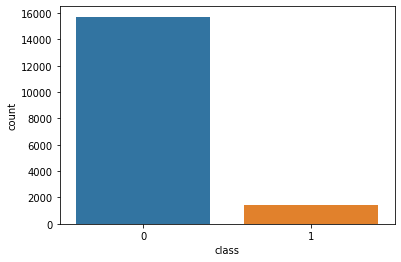

In [22]:
sns.countplot(x='class', data=data)
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных:

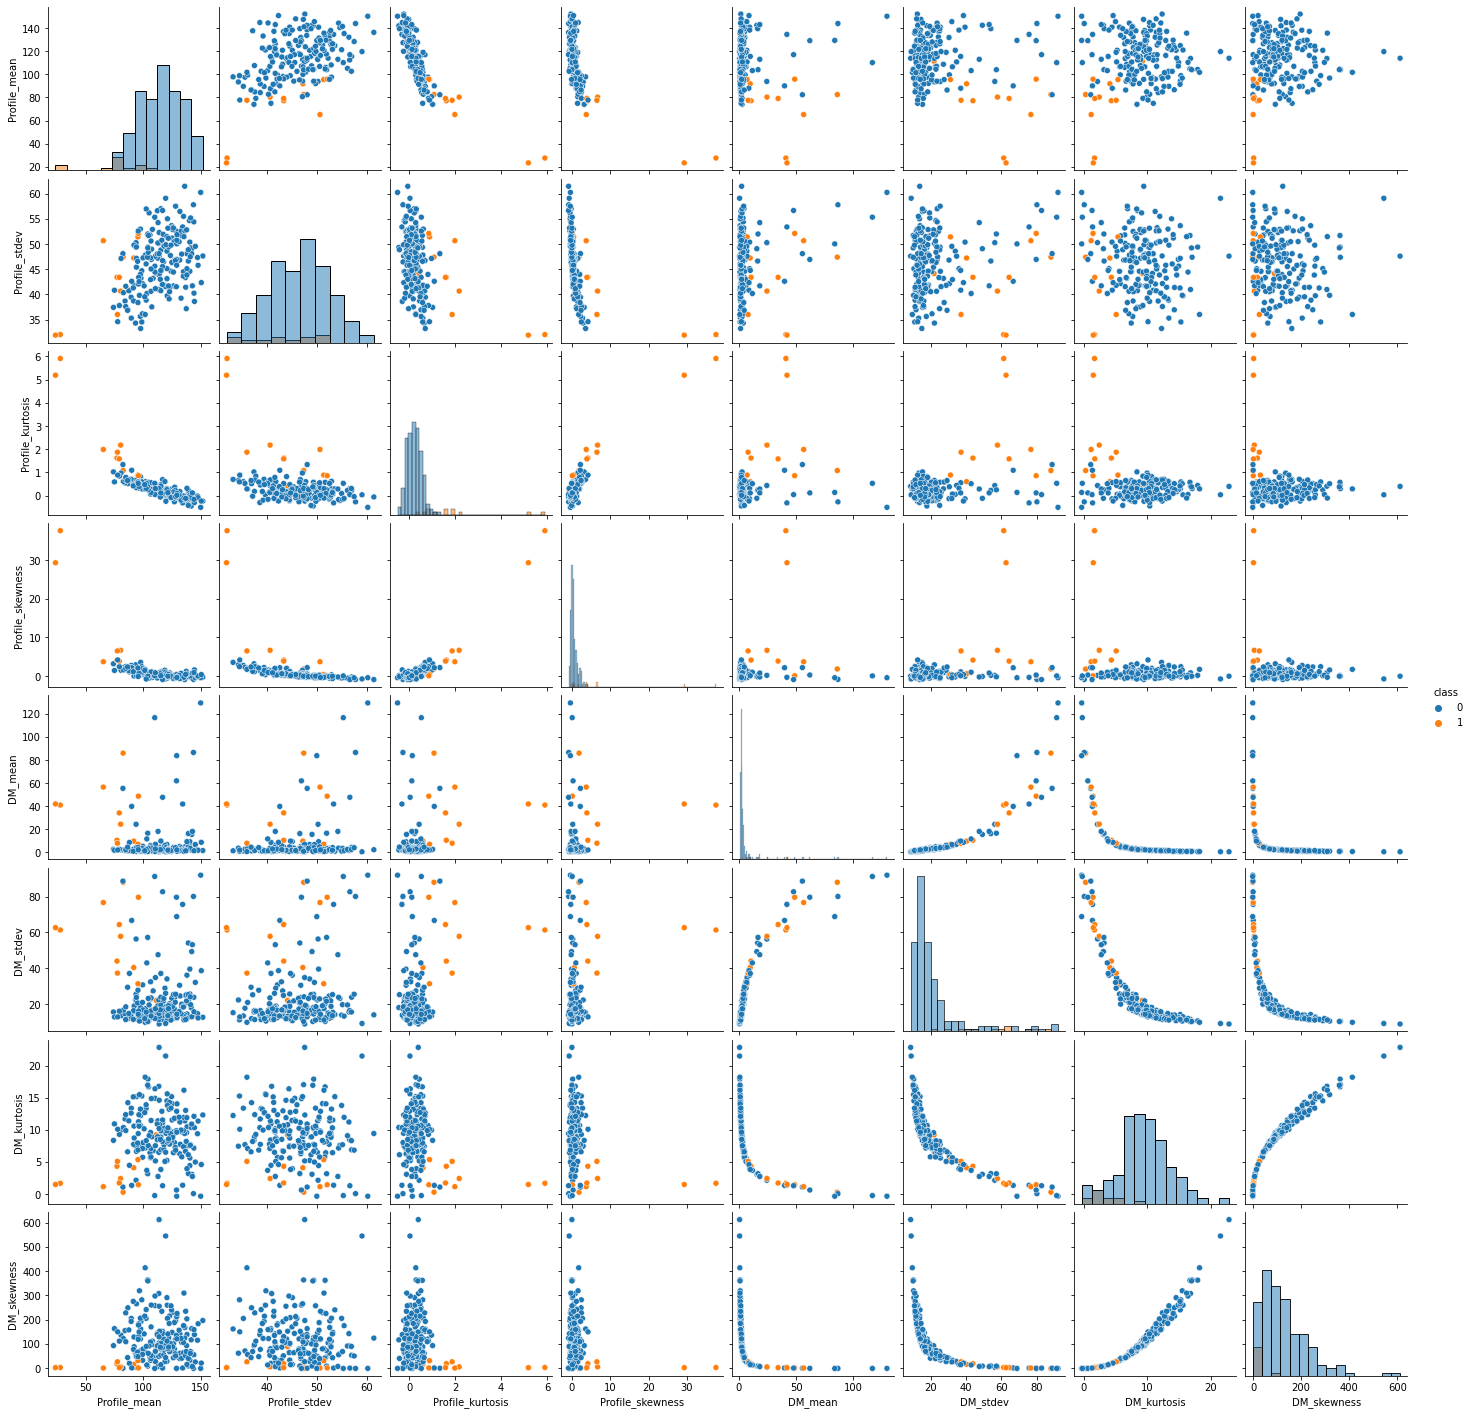

In [23]:
np.random.seed(1)
random_data = np.random.choice(np.arange(data.shape[0]), size=200, replace=False)
sns.pairplot(data.iloc[random_data], hue='class', diag_kind='hist')
pass

Построим матрицу корреляции

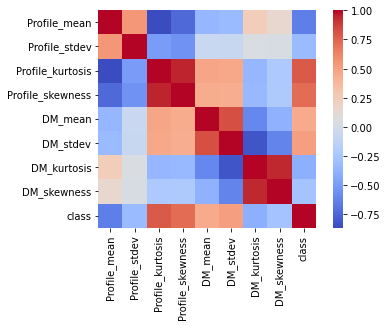

In [24]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Неудивительно, что наблюдаем корреляцию между статистическими характеристиками наших записей.

Однако наиболее интересной является корреляция между классом объекта и **Profile_kurtosis**, **Profile_skewness**, **DM_mean**, **DM_stdev**

### Нормализация количественных признаков
Выполним нормализацию количественных признаков, чтобы они оказывали одинаковое влияние на результат вычислений. Используем стандартизацию.

In [25]:
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object' and c != 'class']
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data = pd.concat((data_numerical, data['class']), axis = 1)
data.describe()

,Profile_mean,Profile_stdev,Profile_kurtosis,Profile_skewness,DM_mean,DM_stdev,DM_kurtosis,DM_skewness,class
count,1.712600e+04,1.712600e+04,1.712600e+04,1.712600e+04,1.712600e+04,1.712600e+04,1.712600e+04,1.712600e+04,17126.000000
mean,-2.331689e-16,4.555506e-16,-1.145100e-16,-4.978695e-18,-1.194887e-16,-3.319130e-17,-2.987217e-17,5.310608e-17,0.081922
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.274254
min,-4.179614e+00,-2.798739e+00,-1.311761e+00,-5.249849e-01,-4.046531e-01,-9.211359e-01,-2.365712e+00,-1.154367e+00,0.000000
25%,-4.382226e-01,-6.431012e-01,-4.494344e-01,-3.409035e-01,-3.410212e-01,-5.993515e-01,-5.675809e-01,-6.986658e-01,0.000000
50%,1.453889e-01,7.246354e-02,-2.310956e-01,-2.573634e-01,-3.031523e-01,-3.830690e-01,1.854752e-02,-2.021936e-01,0.000000
75%,6.468169e-01,7.057900e-01,4.250639e-02,-1.033225e-01,-2.060400e-01,1.081259e-01,5.595430e-01,3.954544e-01,0.000000
max,2.123956e+00,3.347440e+00,6.511312e+00,8.710408e+00,7.404549e+00,4.027214e+00,3.714557e+00,5.690791e+00,1.000000


## Множество признаков X и множество выходов y, разделение на обучающую и тестовую выборку

In [26]:
X = data.drop('class', axis = 1)
y = data['class']
feature_names = X.columns

In [27]:
type(feature_names)

pandas.core.indexes.base.Index

In [28]:
feature_names

Index(['Profile_mean', 'Profile_stdev', 'Profile_kurtosis', 'Profile_skewness',
       'DM_mean', 'DM_stdev', 'DM_kurtosis', 'DM_skewness'],
      dtype='object')

In [29]:
#X = X.to_numpy()
#y = y.to_numpy()

In [30]:
print(X.shape)
print(y.shape)
#N, d = X.shape

(17126, 8)
(17126,)


In [31]:
type(X)

pandas.core.frame.DataFrame

In [32]:
type(y)

pandas.core.series.Series

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

11988 5138


## kNN (Метод k-ближайших соседей)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [35]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print('Train error:', err_train, '\nTest error: ', err_test)

Train error: 0.019936603269936605 
Test error:  0.01946282600233554


In [36]:
err_test = 1 - knn.score(X_test, y_test)
print('Test error: ', err_test)

Test error:  0.01946282600233551


In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[4719   19]
 [  81  319]]


### Подбор параметров

In [38]:
from sklearn.model_selection import GridSearchCV
nnb = list(range(1, 10)) + list(range(10, 51, 5))
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.021354746094756072 9


In [39]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Train error:', err_train, '\nTest error: ', err_test)

Train error: 0.019686353019686353 
Test error:  0.019268197742312185


In [40]:
kk = list(range(1, 10)) + list(range(10, 51, 5))
err_train = []
err_test = []
for k in kk:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

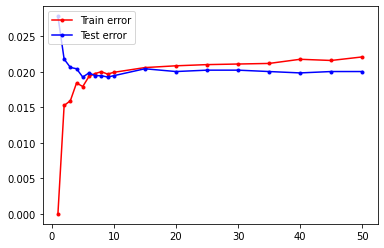

In [41]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')
plt.legend(loc = 2)

In [42]:
print(min(err_test))
print(kk[np.argmin(err_test)])

0.019268197742312185
5


Наименьшая ошибка достигается при k = 5 и равна: 0.019268197742312185

## PCA (Метод главных комнонент)

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
            , columns = ['comp 1', 'comp 2'])
principalDf

,comp 1,comp 2
0,-1.329200,-1.479491
1,-1.048677,-0.238789
2,0.319523,0.413566
3,-1.026952,-1.700126
4,-0.838027,2.391300
...,...,...
17121,-0.235076,0.667111
17122,-2.934507,0.197012
17123,0.864552,-1.971761
17124,0.933367,-3.054201


In [45]:
finalDf = pd.concat([principalDf, pd.DataFrame(data = np.array(y)
             , columns = ['class'])], axis = 1)
finalDf

,comp 1,comp 2,class
0,-1.329200,-1.479491,0
1,-1.048677,-0.238789,0
2,0.319523,0.413566,0
3,-1.026952,-1.700126,0
4,-0.838027,2.391300,0
...,...,...,...
17121,-0.235076,0.667111,0
17122,-2.934507,0.197012,0
17123,0.864552,-1.971761,0
17124,0.933367,-3.054201,0


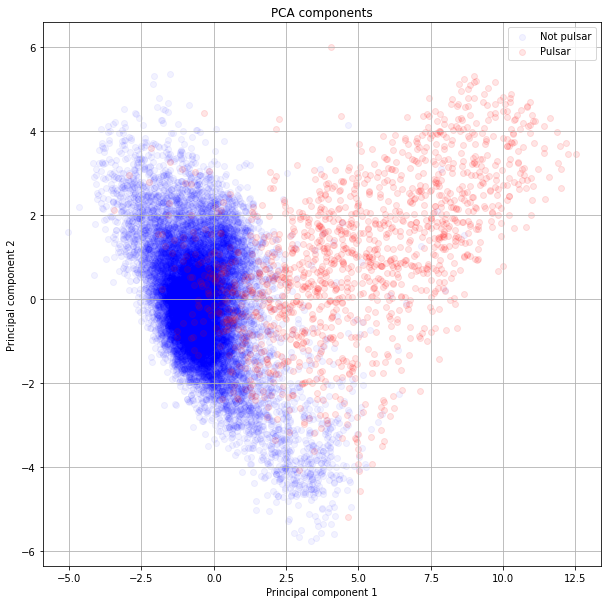

In [46]:
plt.figure(figsize = (10, 10))

plt.scatter(finalDf[finalDf['class'] == 0]['comp 1'],
            finalDf[finalDf['class'] == 0]['comp 2'],
            alpha = 0.05,
            label = 'Not pulsar',
            color = 'b')

plt.scatter(finalDf[finalDf['class'] == 1]['comp 1'],
            finalDf[finalDf['class'] == 1]['comp 2'],
            alpha = 0.1,
            label = 'Pulsar',
            color = 'r')

plt.title('PCA components')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()
plt.grid()

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

11988 5138


In [48]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print('Train error:', err_train, '\nTest error: ', err_test)

Train error: 0.02310643977310644 
Test error:  0.023939275982872713


In [49]:
train_errors = []
test_errors = []
for comp in range(1, 9):
    pca = PCA(n_components = comp)
    principalComponents = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

    train_errors.append(np.mean(knn.predict(X_train) != y_train))
    test_errors.append(np.mean(knn.predict(X_test) != y_test))
print('Train errors:')
print(train_errors)
print('Test errors:')
print(test_errors)

Train errors:
[0.03178178178178178, 0.02310643977310644, 0.020603937270603938, 0.020437103770437105, 0.019185852519185854, 0.018435101768435103, 0.01768435101768435, 0.017934601267934603]
Test errors:
[0.043791358505254965, 0.023939275982872713, 0.019268197742312185, 0.02024133904242896, 0.01985208252238225, 0.019657454262358893, 0.01985208252238225, 0.019268197742312185]


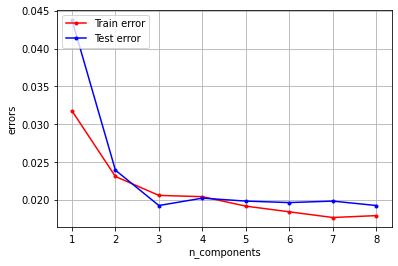

In [50]:
plt.grid()
plt.plot(range(1, 9), train_errors, '.-r', label = 'Train error')
plt.plot(range(1, 9), test_errors,  '.-b', label = 'Test error')
plt.xlabel('n_components')
plt.ylabel('errors')
plt.legend(loc = 2)

## Нейронные сети

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

In [52]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs',
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

In [53]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.014554645284992156 0.02176220806794055


In [54]:
from sklearn.neural_network import MLPClassifier

mlp_model1 = MLPClassifier(hidden_layer_sizes = (100, 2), solver = 'lbfgs',
                          activation = 'logistic', random_state = 42)
mlp_model1.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 2),
              random_state=42, solver='lbfgs')

In [55]:
y_train_pred = mlp_model1.predict(X_train)
y_test_pred = mlp_model1.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.017082098657835106 0.019815994338287332


### Подбор гиперпараметров

Подбор параметра alpha

In [56]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,),
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

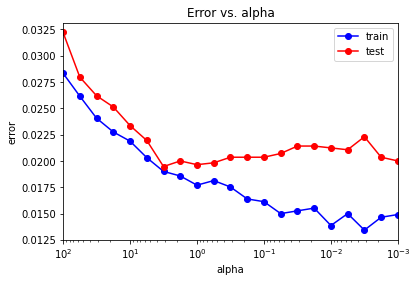

In [57]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [58]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.013421648945441868 0.019462137296532202


In [59]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)
alpha_opt = alpha_opt[0]

[3.16227766]


In [60]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.018999477078612517
0.019462137296532202


In [61]:
print(confusion_matrix(y_test_pred, y_test))

[[5153   84]
 [  26  389]]


Подбор числа нейронов

In [62]:
neurons_arr = np.arange(10, 151, 10)

test_err = []
train_err = []
for neurons in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neurons,),
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

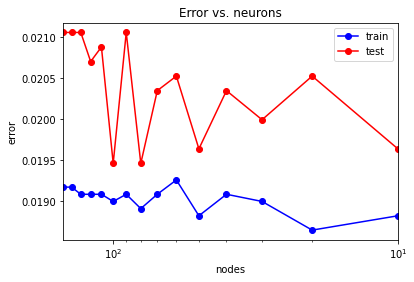

In [63]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neurons')
plt.xlabel('nodes')
plt.ylabel('error')
plt.legend()

In [64]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.01865086282028935 0.019462137296532202


In [65]:
neurons_opt = neurons_arr[test_err == min_test_err]
print(neurons_opt)

[ 80 100]


In [66]:
neurons_opt = neurons_opt[0]

In [67]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neurons_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.018912323514031725
0.019462137296532202


In [68]:
print(confusion_matrix(y_test_pred, y_test))

[[5153   84]
 [  26  389]]


# Random Forests

In [69]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=9)
forest_model.fit(X_train, y_train)
y_train_pred = forest_model.predict(X_train)
y_test_pred = forest_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))
print(1-forest_model.oob_score_)

0.0
0.0199929228591649
0.020132473418162822


In [70]:
y_train_preds = []
y_test_preds = []
oob_err_preds = []

for t in range(5, 101, 5):
    forest_model = RandomForestClassifier(n_estimators=t, oob_score=True, random_state=9)
    forest_model.fit(X_train, y_train)
    y_train_pred = forest_model.predict(X_train)
    y_test_pred = forest_model.predict(X_test)
    y_train_preds.append(np.mean(y_train != y_train_pred))
    y_test_preds.append(np.mean(y_test != y_test_pred))
    oob_err_preds.append(1-forest_model.oob_score_)

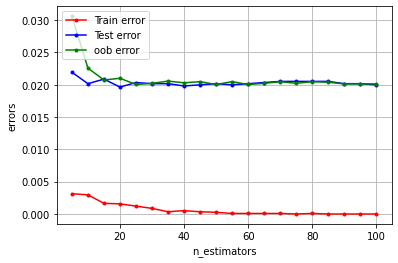

In [71]:
plt.grid()
plt.plot(range(5, 101, 5), y_train_preds, '.-r', label = 'Train error')
plt.plot(range(5, 101, 5), y_test_preds,  '.-b', label = 'Test error')
plt.plot(range(5, 101, 5), oob_err_preds,  '.-g', label = 'oob error')
plt.xlabel('n_estimators')
plt.ylabel('errors')
plt.legend(loc = 2)

In [72]:
print(np.min(y_test_preds))
print(np.argmin(y_test_preds))
print(y_test_preds[6])
print(y_train_preds[6])
print(oob_err_preds[6])

0.019639065817409766
3
0.020169851380042462
0.0003486142583231654
0.02056824124106671


In [73]:
print(confusion_matrix(y_test_pred, y_test))

[[5147   81]
 [  32  392]]


# Результаты

| Метод | Ошибка на тренировке | Ошибка на тесте |
|-------|----------------------|-----------------|
|**kNN** (k=5) | 0.019686353019686353 | 0.019268197742312185 |
| **PCA** (2 comp) | 0.02310643977310644 | 0.023939275982872713 |
| **PCA** (8 comp)| 0.017934601267934603 | 0.019268197742312185 |
| **FCNN** (n=80, alpha=3.16227766) | 0.018912323514031725 | 0.019462137296532202 |
| **RF** (3 trees) | 0.0003486142583231654 | 0.020169851380042462 |

